In [4]:
from numpy import *
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
n=1000
ba= nx.barabasi_albert_graph(n,2)

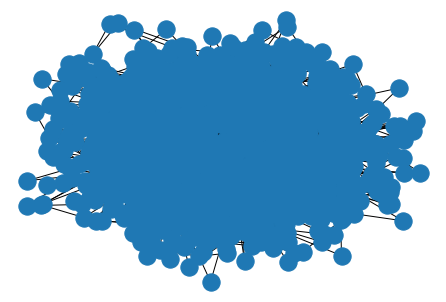

In [6]:
nx.draw(ba)

In [7]:
xdata=[]
ydata=[]

In [8]:
for i,j in ba.edges:
    xdata.append(ba.degree(i))
    xdata.append(ba.degree(j))
    ydata.append(ba.degree(j))
    ydata.append(ba.degree(i))

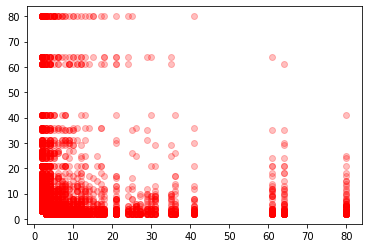

In [9]:
plt.plot(xdata,ydata,'or',alpha=0.25)

In [10]:
nx.degree_assortativity_coefficient(ba)

-0.10273775397223732

In [11]:
g = nx.DiGraph()

In [12]:
 g.add_edges_from([(0,1), (0,2), (0,3), (1,2), (2,3), (3,0)])

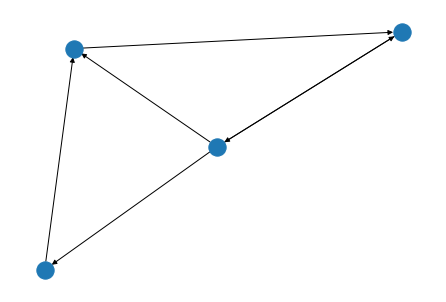

In [13]:
nx.draw(g)

In [14]:
nx.degree_assortativity_coefficient(g, x = 'in', y = 'in')

-0.250000000000001

In [15]:
nx.degree_assortativity_coefficient(g, x = 'out', y = 'out')

-0.4472135954999585

In [16]:
nx.degree_assortativity_coefficient(g, x = 'in', y = 'out')

0.6324555320336761

In [17]:
nx.degree_assortativity_coefficient(g, x = 'out', y = 'in')

0.0

In [18]:
karate=nx.karate_club_graph()

In [19]:
xdata=[]
ydata=[]
for i,j in karate.edges:
    xdata.append(karate.degree(i))
    xdata.append(karate.degree(j))
    ydata.append(karate.degree(j))
    ydata.append(karate.degree(i))

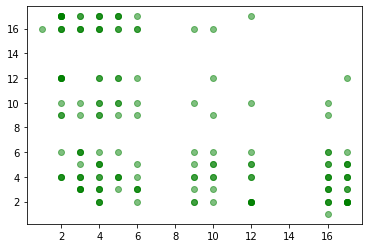

In [20]:
plt.plot(xdata,ydata,'og',alpha=0.5)

In [35]:
nx.degree_assortativity_coefficient(karate)

-0.47561309768461457

In [24]:
import networkx.algorithms.community as nxcom
import random
from numpy import random as nprand

In [25]:
random.seed(123)
nprand.seed(123)

In [26]:
com = sorted(nxcom.greedy_modularity_communities(karate), key=len, reverse=True)

In [28]:
len(com)

3

In [29]:
def set_node_community(G, com):
        '''Add community to node attributes'''
        for c, v_c in enumerate(com):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1


In [30]:
def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0

In [31]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)   

In [48]:
set_node_community(karate,com)

In [49]:
set_edge_community(karate)

In [50]:
node_color=[get_color(karate.nodes[v]['community']) for v in karate.nodes]

In [51]:
external = [(v, w) for v, w in karate.edges if karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in karate.edges if karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

In [52]:
karate_pos = nx.spring_layout(karate)

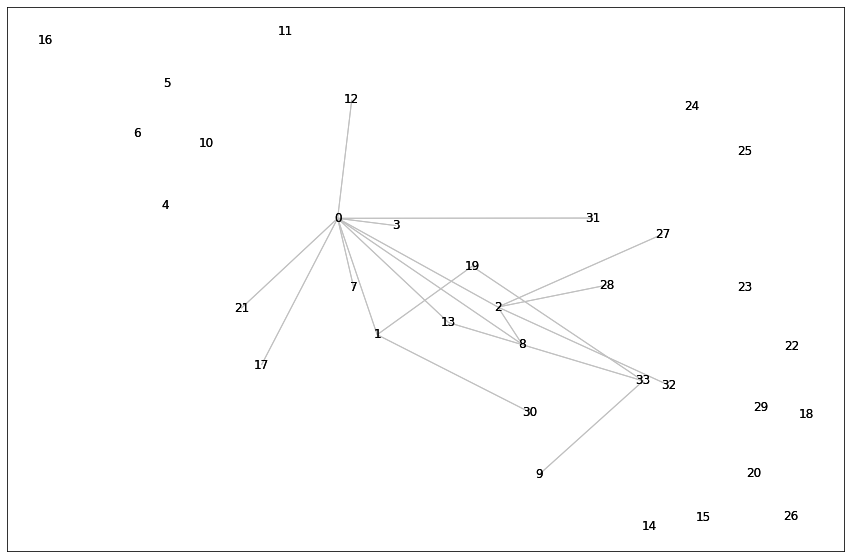

In [53]:
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
        karate,
        pos=karate_pos,
        node_size=0,
        edgelist=external,
        edge_color="silver")
nx.draw_networkx(
        karate,
        pos=karate_pos,
        node_size=0,
        edgelist=external,
        edge_color="silver")

In [54]:
data_path = './facebook_combined.txt'
G_social = nx.read_edgelist(data_path)

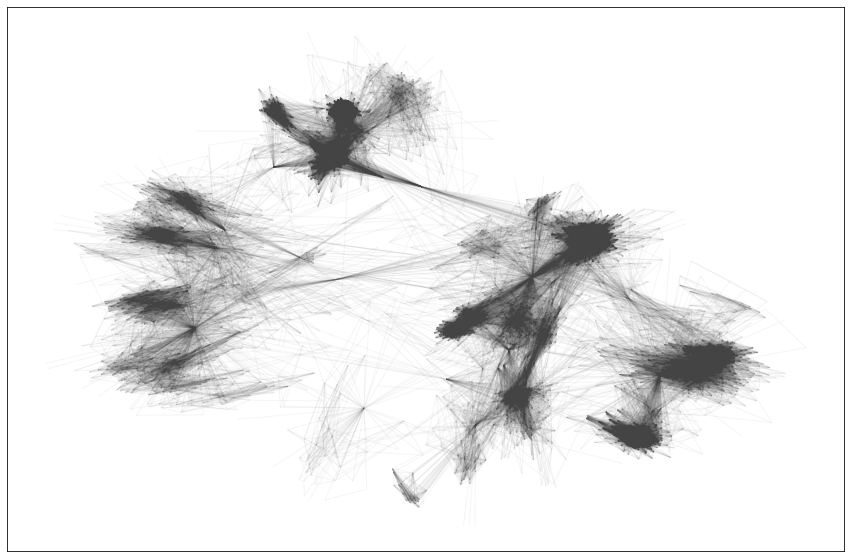

In [55]:
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edge_color="#444444", 
    alpha=0.05, 
    with_labels=False)

In [56]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

13

In [57]:
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

In [58]:
set_node_community(G_social, communities)
set_edge_community(G_social)

In [59]:
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]

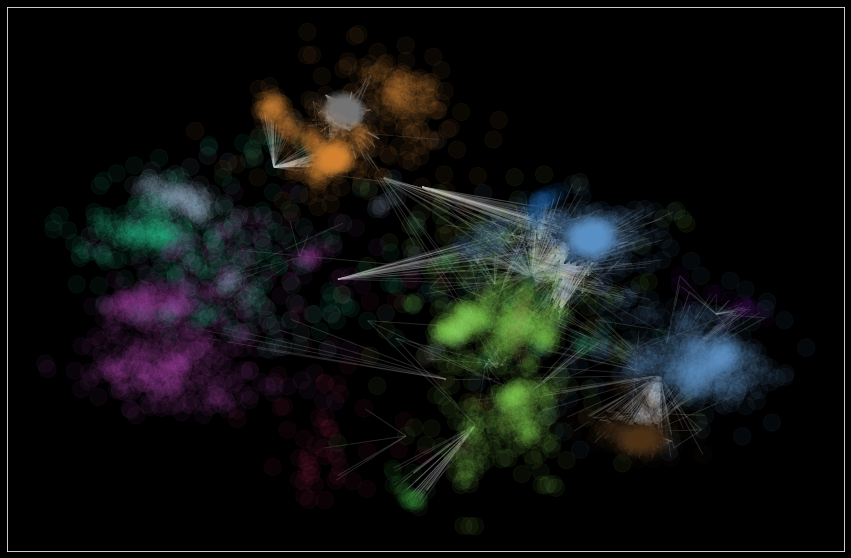

In [60]:
nx.draw_networkx(
        G_social, 
        pos=pos, 
        node_size=0, 
        edgelist=external, 
        edge_color="silver",
        node_color=node_color,
        alpha=0.2, 
        with_labels=False)
    # internal edges
nx.draw_networkx(
        G_social, pos=pos, 

        edgelist=internal, 
        edge_color=internal_color,
        node_color=node_color,
        alpha=0.05, 
        with_labels=False)